# Let's start out ITSA by importing libraries as usual
## Pandas for processing data
## What do we use for ITSA?

In [1]:
import numpy as np
import pandas as pd

## Let's read in our dataframe, and if look at the output
### For this analysis we just need the date, sentiment_analysis, and language so we will drop all other columns
### Some of the tweets failed sentiment analysis and so we drop rows where sentiment_analysis column = 'e', as error from sentiment analysis notebook got save as e for some reason

In [2]:
cols = ['date', 'lang', 'user']
df = pd.read_csv('data/filtered_df.csv', usecols=cols)
df

/tmp/ipykernel_54656/3434215136.py:2: DtypeWarning: Columns (3,7,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/filtered_df.csv', usecols=cols)


,date,user,lang
0,2022-09-16 21:43:23+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",en
1,2022-09-16 21:41:11+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",en
2,2022-09-16 21:39:28+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",en
3,2022-09-16 21:34:32+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",en
4,2022-09-16 21:31:36+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",en
...,...,...,...
1648279,2020-01-01 00:37:27+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",en
1648280,2020-01-01 00:30:00+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",en
1648281,2020-01-01 00:15:00+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",en
1648282,2020-01-01 00:10:02+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",en


In [3]:
def convert_user(element):
    try:
        dict_elem = eval(element)
        return dict_elem['username']
    except:
        return "e"

df['user'] = df['user'].apply(lambda x: convert_user(x))
df

,date,user,lang
0,2022-09-16 21:43:23+00:00,ApollyonI,en
1,2022-09-16 21:41:11+00:00,jimmywal3,en
2,2022-09-16 21:39:28+00:00,HappyNightOwl,en
3,2022-09-16 21:34:32+00:00,David_Mohl,en
4,2022-09-16 21:31:36+00:00,Tweazel504,en
...,...,...,...
1648279,2020-01-01 00:37:27+00:00,blt_thorne,en
1648280,2020-01-01 00:30:00+00:00,FOX59,en
1648281,2020-01-01 00:15:00+00:00,mynbc15,en
1648282,2020-01-01 00:10:02+00:00,ElleBee1935,en


In [4]:
df = df[df['user'] != 'e']
df

,date,user,lang
0,2022-09-16 21:43:23+00:00,ApollyonI,en
1,2022-09-16 21:41:11+00:00,jimmywal3,en
2,2022-09-16 21:39:28+00:00,HappyNightOwl,en
3,2022-09-16 21:34:32+00:00,David_Mohl,en
4,2022-09-16 21:31:36+00:00,Tweazel504,en
...,...,...,...
1648279,2020-01-01 00:37:27+00:00,blt_thorne,en
1648280,2020-01-01 00:30:00+00:00,FOX59,en
1648281,2020-01-01 00:15:00+00:00,mynbc15,en
1648282,2020-01-01 00:10:02+00:00,ElleBee1935,en


### If you are familiar with ITSA (interrupted time series analysis) you know it works on numeric data, usually continuous
### So to do ITSA, we will need to essentially one-hot (or categorical -> numerical map) our sentiment labels NEG-> 0, NEU -> 1, POS -> 2

### We should probably drop all languages that are not english for this analysis

In [5]:
df = df[df.lang == 'en']
df

,date,user,lang
0,2022-09-16 21:43:23+00:00,ApollyonI,en
1,2022-09-16 21:41:11+00:00,jimmywal3,en
2,2022-09-16 21:39:28+00:00,HappyNightOwl,en
3,2022-09-16 21:34:32+00:00,David_Mohl,en
4,2022-09-16 21:31:36+00:00,Tweazel504,en
...,...,...,...
1648279,2020-01-01 00:37:27+00:00,blt_thorne,en
1648280,2020-01-01 00:30:00+00:00,FOX59,en
1648281,2020-01-01 00:15:00+00:00,mynbc15,en
1648282,2020-01-01 00:10:02+00:00,ElleBee1935,en


### Let's organize the data by date time as an index, group by Month and plot the trend of our now one-hot score sentiment as a month average = y, over months = x

In [6]:
df['date'] = pd.to_datetime(df['date'])
df.index = pd.to_datetime(df['date'],format='%m/%d/%y %I:%M%p')
#df.drop('lang', axis=1, inplace=True)
df = df.groupby(pd.Grouper(freq='SM')).apply(lambda x: x.user.nunique())
df

/tmp/ipykernel_54656/2538980034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


date
2019-12-31 00:00:00+00:00     3520
2020-01-15 00:00:00+00:00     6804
2020-01-31 00:00:00+00:00     5116
2020-02-15 00:00:00+00:00     4882
2020-02-29 00:00:00+00:00     7590
                             ...  
2022-07-15 00:00:00+00:00    62364
2022-07-31 00:00:00+00:00    38867
2022-08-15 00:00:00+00:00    41064
2022-08-31 00:00:00+00:00    46137
2022-09-15 00:00:00+00:00     7909
Freq: SM-15, Length: 66, dtype: int64

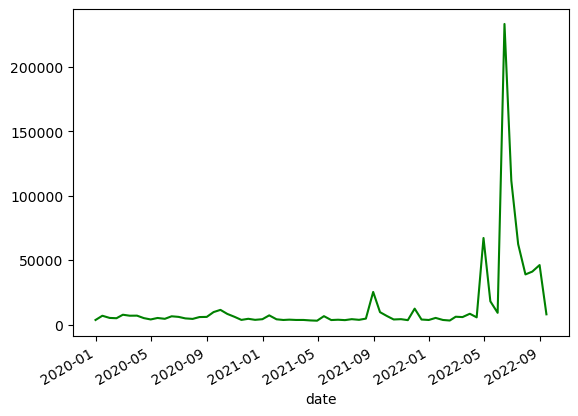

In [7]:
import matplotlib.pyplot as plt
fig = df.plot(color = ['g', 'y'])
plt.show()